# STAT 207 Project 01 - "Analyzing Trends and Success Factors in the Video Game Industry"


## 1. Introduction

The analysis focused on exploring "What is relationship between the console platform and US sales figures, alongside the temporal trend in video game releases."  A Data-Driven Approach to US Sales and Console Platforms (2004-2010)

My motivation for analyzing these issues in the context of video game sales and console platform projects is to understand market dynamics. This analysis I think has a more intuitive analysis for developers, publishers and sales people. At the same time the relationship between console platforms and sales data helps reveal consumer preferences, including the consoles and game genres that are more attractive to the market. Overall, this is a great report on how the relationship between video games and console platforms is performing in the marketplace.

Like I said above, this report I think those publishers, game developers, marketers, etc. will be potential targets. They will be potential readers.

In [2]:
#Imports here
import pandas as pd
import numpy as np
import seaborn as sns   
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

## 2. Dataset Discussion

The dataset contains information about sales and playtime of over a thousand video games released between 2004 and 2010. The playtime information was collected from crowd-sourced data on "How Long to Beat". This data was originally downloaded on February 8, 2024, from the University of Portsmouth's research portal.

In this dataset, each row in the dataset represents a video game, including his console platform, year of release, title, sales figures, gameplay, and other variables. The type of data here I think can be considered as a sample of video games released in a specified time period. This is not a census of all video games, but a representative sample of popular or notable games.

In this dataset, each row in the dataset represents a video game, including his console platform, year of release, title, sales figures, gameplay, and other variables. The type of data here I think can be considered as a sample of video games released in a specified time period. This is not a census of all video games, but a representative sample of popular or notable games. The three variables I intend to analyze are 'Console', 'Us Sales(millions)' and 'YearReleased'.
I see two limitations and key considerations. The first is that this dataset is only sales within the United States, which is not representative of the world. The second point is that this dataset only contains data between 2004-2010, which limits the relevance of analyzing more current popular games.


In [3]:
video_games_df = pd.read_csv('video_games.csv',encoding='unicode_escape')
video_games_df.head()

,Console,Title,US Sales (millions),Block4,Block2,Block1,Block0.5,YearReleased,2004,2005,...,Tricks,Volleyball,Wakeboarding,Wrestling,FirstPerson,Platform,Isometric,SideScrolling,TopDown,ThirdPerson
0,Nintendo DS,Super Mario 64 DS,4.69,1,1,1,1,2004,1,0,...,0,0,0,0,0,1,0,0,0,1
1,Sony PSP,Lumines: Puzzle Fusion,0.56,0,0,0,1,2004,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Nintendo DS,WarioWare Touched!,0.54,0,0,0,1,2004,1,0,...,0,0,0,0,0,1,1,1,1,1
3,Sony PSP,Hot Shots Golf: Open Tee,0.49,0,0,0,0,2004,1,0,...,0,0,0,0,0,0,0,0,0,1
4,Nintendo DS,Spider-Man 2,0.45,0,0,0,0,2004,1,0,...,0,0,0,0,0,1,0,1,0,1


## 3. Dataset Cleaning

In [4]:
video_games_df.dtypes

Console                 object
Title                   object
US Sales (millions)    float64
Block4                   int64
Block2                   int64
                        ...   
Platform                 int64
Isometric                int64
SideScrolling            int64
TopDown                  int64
ThirdPerson              int64
Length: 166, dtype: object

In [5]:
missing_values = video_games_df.isnull().sum()

dataset_info = video_games_df.info()

print(missing_values,dataset_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770 entries, 0 to 1769
Columns: 166 entries, Console to ThirdPerson
dtypes: float64(3), int64(159), object(4)
memory usage: 2.2+ MB
Console                0
Title                  0
US Sales (millions)    0
Block4                 0
Block2                 0
                      ..
Platform               0
Isometric              0
SideScrolling          0
TopDown                0
ThirdPerson            0
Length: 166, dtype: int64 None


## 4. Summarizing Data

In [6]:
sns.set_style("whitegrid")

sales_stats = video_games_df['US Sales (millions)'].describe()
sales_stats

count    1770.000000
mean        0.479785
std         1.064915
min         0.010000
25%         0.090000
50%         0.190000
75%         0.450000
max        14.660000
Name: US Sales (millions), dtype: float64

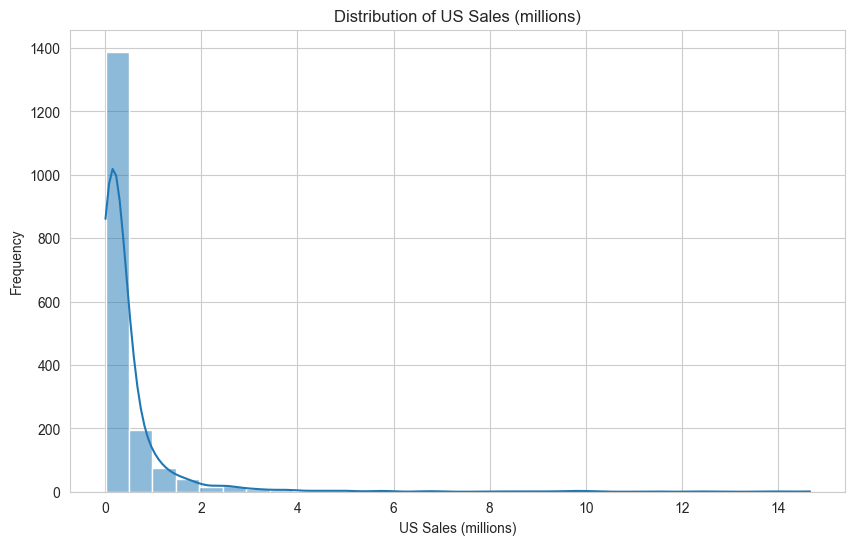

In [7]:
# Distribution of 'US Sales (millions)'
plt.figure(figsize=(10, 6))
sns.histplot(video_games_df['US Sales (millions)'], bins=30, kde=True)
plt.title('Distribution of US Sales (millions)')
plt.xlabel('US Sales (millions)')
plt.ylabel('Frequency')
plt.show()

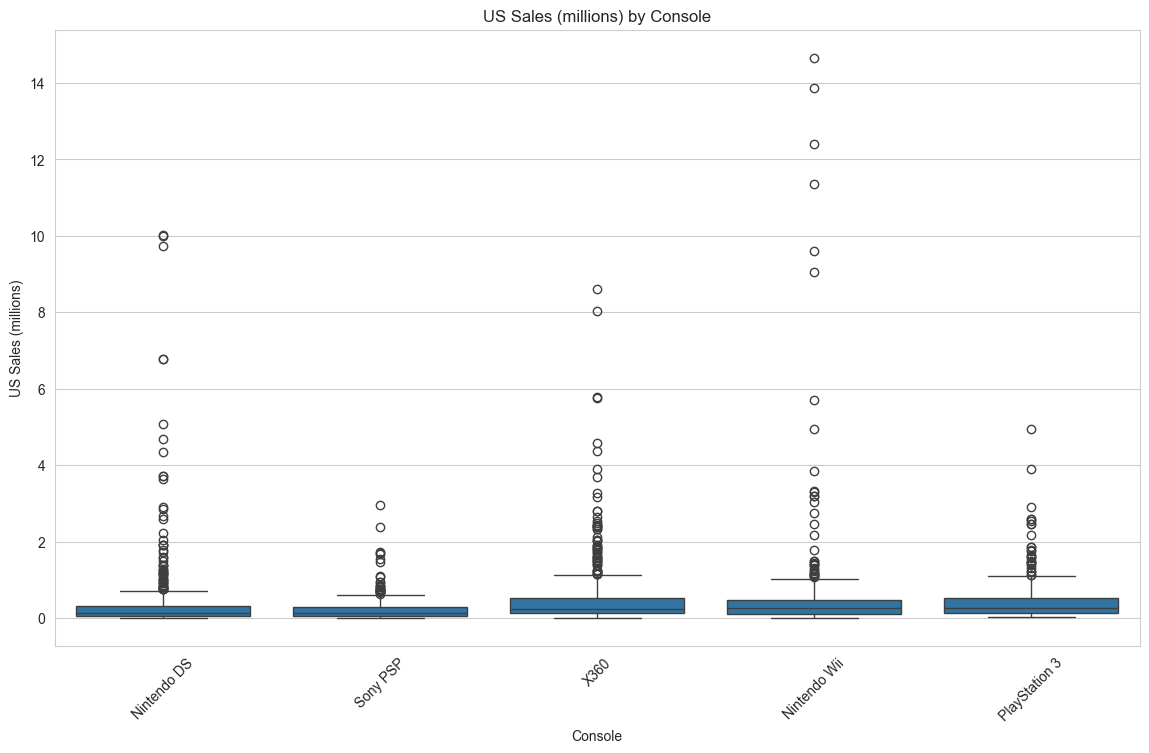

In [8]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Console', y='US Sales (millions)', data=video_games_df)
plt.title('US Sales (millions) by Console')
plt.xticks(rotation=45)
plt.xlabel('Console')
plt.ylabel('US Sales (millions)')
plt.show()


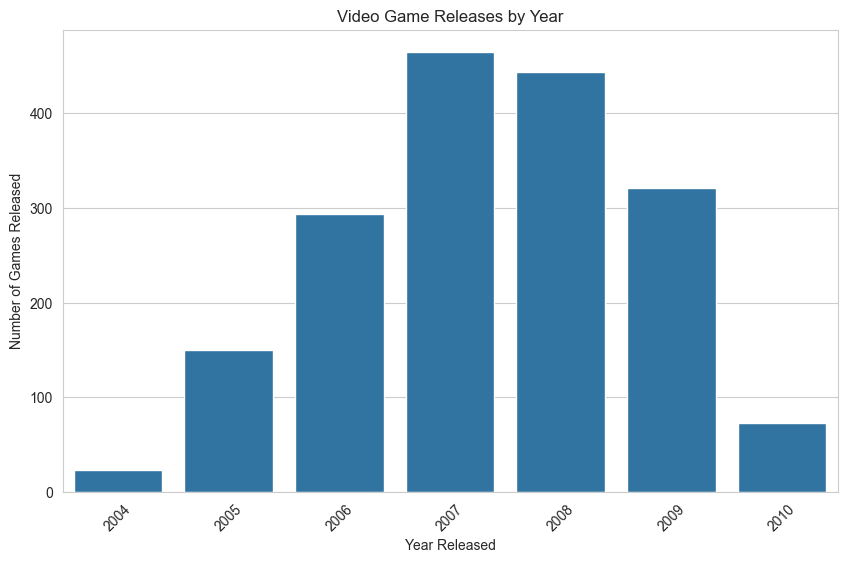

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='YearReleased', data=video_games_df)
plt.title('Video Game Releases by Year')
plt.xlabel('Year Released')
plt.ylabel('Number of Games Released')
plt.xticks(rotation=45)
plt.show()

In [10]:
sales_stats

count    1770.000000
mean        0.479785
std         1.064915
min         0.010000
25%         0.090000
50%         0.190000
75%         0.450000
max        14.660000
Name: US Sales (millions), dtype: float64

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

In [11]:
numeric_df = video_games_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
correlation_matrix

,US Sales (millions),Block4,Block2,Block1,Block0.5,YearReleased,2004,2005,2006,2007,...,Tricks,Volleyball,Wakeboarding,Wrestling,FirstPerson,Platform,Isometric,SideScrolling,TopDown,ThirdPerson
US Sales (millions),1.000000,0.796541,0.756779,0.661727,0.547675,0.007793,-0.005928,0.011837,-0.005999,-0.011094,...,-0.018618,-0.000996,0.299042,-0.007565,0.060291,0.047944,-0.057171,0.003461,-0.076523,0.025250
Block4,0.796541,1.000000,0.561287,0.335851,0.218716,-0.019659,0.030885,0.018823,0.002408,-0.011816,...,-0.014809,-0.005461,0.207214,-0.010608,0.029284,0.053081,-0.027477,0.021826,-0.042212,-0.026007
Block2,0.756779,0.561287,1.000000,0.598358,0.389669,0.013268,0.001968,-0.000175,-0.013873,-0.004269,...,-0.026383,-0.009729,0.116306,-0.018899,0.047477,0.039050,-0.048954,-0.006570,-0.048549,0.004855
Block1,0.661727,0.335851,0.598358,1.000000,0.651230,0.024381,-0.022894,-0.011126,-0.013540,0.005867,...,-0.029546,0.022631,0.069593,-0.031585,0.090019,0.032132,-0.065507,-0.018015,-0.068695,0.034975
Block0.5,0.547675,0.218716,0.389669,0.651230,1.000000,0.038944,-0.023815,-0.011701,-0.023804,-0.010472,...,-0.013617,0.003954,0.045321,-0.003555,0.089229,0.047576,-0.071058,-0.021446,-0.070091,0.052008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Platform,0.047944,0.053081,0.039050,0.032132,0.047576,-0.039712,0.053081,0.035622,-0.008508,-0.015748,...,-0.039842,-0.014692,-0.007340,-0.028540,-0.140089,1.000000,-0.011971,0.422017,-0.002216,0.080842
Isometric,-0.057171,-0.027477,-0.048954,-0.065507,-0.071058,-0.034630,0.016576,0.043570,0.000364,-0.006917,...,-0.011257,-0.011397,-0.005694,-0.022139,-0.099101,-0.011971,1.000000,0.031488,0.112056,-0.126943
SideScrolling,0.003461,0.021826,-0.006570,-0.018015,-0.021446,-0.041351,0.040311,0.046118,0.021069,-0.046517,...,-0.004844,-0.013948,-0.006968,-0.027094,-0.129871,0.422017,0.031488,1.000000,0.073070,0.009481
TopDown,-0.076523,-0.042212,-0.048549,-0.068695,-0.070091,-0.077850,0.034766,0.044566,0.013832,0.010173,...,-0.047481,0.019210,-0.008747,-0.014991,-0.116215,-0.002216,0.112056,0.073070,1.000000,-0.178483


<Axes: xlabel='YearReleased', ylabel='US Sales (millions)'>

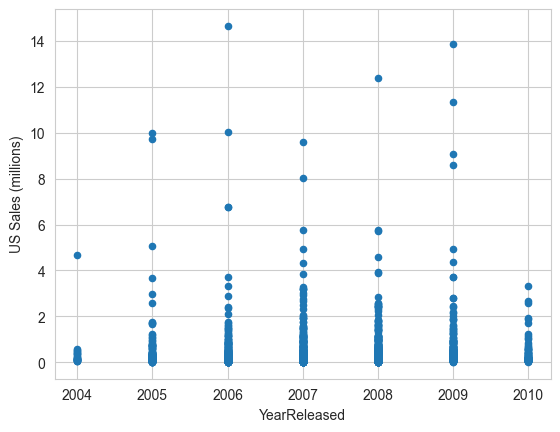

In [12]:
video_games_df.plot.scatter(x='YearReleased', y='US Sales (millions)')


> $$y = (\text{slope}) * X + \text{intercept}$$
> $$\text{slope} = r * \frac{SD(y)}{SD(x)}$$
Where $r$ is the correlation coefficient between $X$ and $y$, and $SD$ stands for standard deviation. 

With this, find the slope of the regression line where the dependent variable ($y$) is `YearReleased` and the independent variable ($X$) is `US Sales (millions)`, storing your answer in the **numeric variable** `slope` below:

In [13]:
numerical_cols = ['YearReleased', 'US Sales (millions)']
numeric_df = video_games_df[numerical_cols]
correlation_matrix=numeric_df.corr()
r = correlation_matrix.loc['YearReleased', 'US Sales (millions)']
std_year = numeric_df['YearReleased'].std()
std_sales = numeric_df['US Sales (millions)'].std()
slope = r * (std_sales / std_year)
print(r, slope)

0.007792806230299748 0.006119575773498907


**Calculating Intercept of the Regression Line**
How to calculate the **y-intercept** of the regression line in lecture. The formula is as follows:

> $$\text{intercept} = \text{avg}(y) - \text{slope} * \text{avg}(X)$$

Find the **y-intercept** of the regression line between `US Sales (million)` ($y$) and `YearReleased` ($X$), storing your result in the numeric variable `intercept` below: 

In [14]:
intercept = numeric_df['US Sales (millions)'].mean() - (0.006119575773498858 * numeric_df['YearReleased'].mean())
intercept



-11.804422909415928

## Now, it's time to visualize our regression line!
Now that we have calculated the **slope** and **y-intercept** of your regression line, let's **visualize** it. Run the following code that uses the `seaborn` library to **plot a regression line** on top of a scatter plot of between `YearRelased` and `US Sales (millions)` - your regression line will be **red**. 

RESE is 2006.883661235051


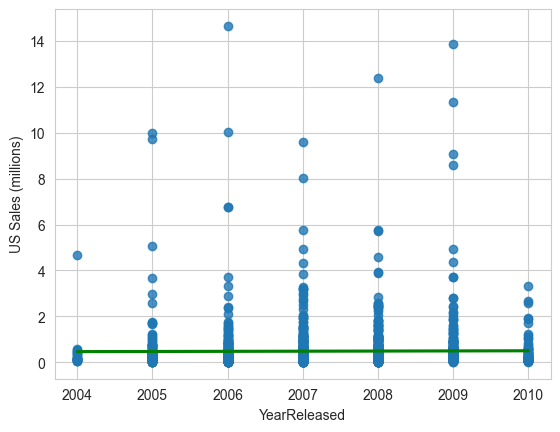

In [15]:
sns.regplot(data=video_games_df, x="YearReleased", y="US Sales (millions)", ci=None, line_kws={'color':'green'})
RMSE = mean_squared_error(numeric_df["US Sales (millions)"], numeric_df["YearReleased"])**0.5
print('RESE is', RMSE)

**Given the very weak correlation and the minimal slope, it suggests that there is almost no linear relationship between the year a game was released and its sales figures in the US**

## 5. Conclusion

***Summarization***

In this project, we embarked on an exploratory analysis of the video game industry, examining the relationship between the release year of video games and their sales figures in the United States from 2004 to 2010. The dataset, free from missing values, underwent a thorough cleaning process to ensure its integrity for the analysis. Utilizing descriptive statistics and visualizations, we investigated the distribution of sales across different console platforms and observed the trends in video game releases over the years. Through linear regression, we sought to quantify the relationship between the year of release and sales, which yielded a minimal slope and a negligible correlation coefficient, indicating an almost non-existent linear relationship.

***Limitations***

Our analysis faced several limitations. The dataset's scope was restricted to US sales, omitting a global perspective which could have provided a more comprehensive understanding of the games' success. The timeframe of the data also limited the applicability of our findings to the present and future gaming industry. Moreover, the linear regression model's weak correlation suggested that other factors, potentially unaccounted for in the dataset, might play a more significant role in determining sales figures.

***Future Work***

Future research could extend beyond the limitations by incorporating global sales data and additional variables that may influence a game's success, such as marketing efforts, game genre, and reviews. Advanced statistical models or machine learning techniques could also be employed to handle the complexity and multi-dimensional nature of video game success. Further investigations might explore how digital downloads and online gaming platforms have reshaped the industry's sales patterns in recent years.

